In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, pearsonr

In [83]:
df= pd.read_csv('cleaned_datas.csv')
df
raw_df = pd.read_csv('SBAnational.csv')

/tmp/ipykernel_5970/215476489.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('SBAnational.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  899164 non-null  int64  
 1   Name           899150 non-null  object 
 2   City           899134 non-null  object 
 3   State          899150 non-null  object 
 4   Zip            899164 non-null  int64  
 5   Bank           897605 non-null  object 
 6   BankState      897598 non-null  object 
 7   NAICS          899164 non-null  int64  
 8   NoEmp          899164 non-null  int64  
 9   NewExist       899028 non-null  float64
 10  FranchiseCode  899164 non-null  int64  
 11  UrbanRural     899164 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 82.3+ MB


Why 'NewExist' columns is in float type ? Maybe we will have to change that for further analysis

## Outliers identification

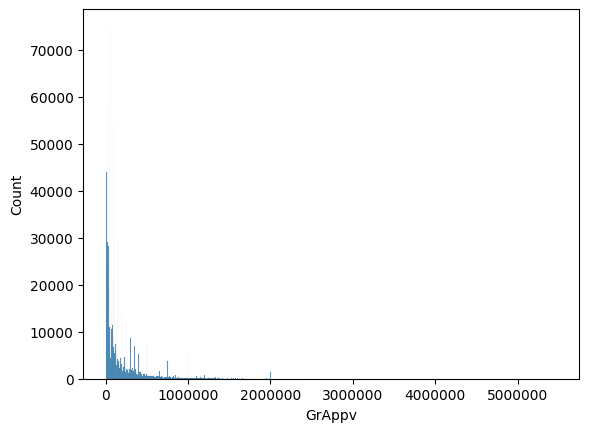

In [49]:
#Is there a meaning to do this part since all our continue variables seems to be more categorical value than continuous one.
fig, ax = plt.subplots()
# ax.plot(x,y)
sns.histplot(df, x="GrAppv", ax=ax)
ax.ticklabel_format(style='plain', axis='x')
plt.show()


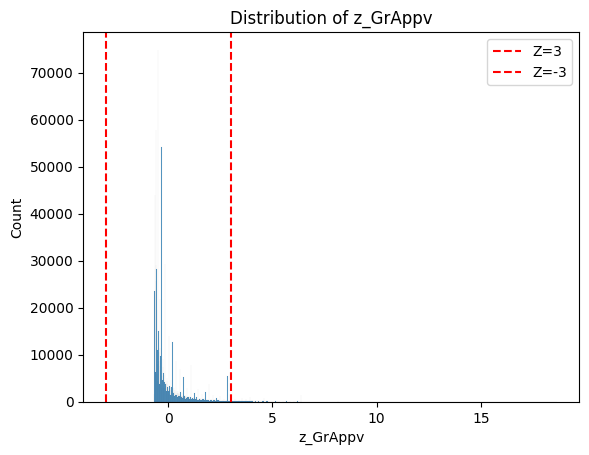

In [50]:
#zscore
zscore=stats.zscore(df['GrAppv'])
df_zscore=pd.DataFrame(zscore, columns=['z_GrAppv'])
sns.histplot(x=df_zscore.z_GrAppv)

plt.axvline(3, color='red', linestyle='--', label='Z=3')
plt.axvline(-3, color='red', linestyle='--', label='Z=-3')
plt.legend()
plt.title('Distribution of z_GrAppv')
plt.show()

#### Logarithmic transformation of the GrAppv

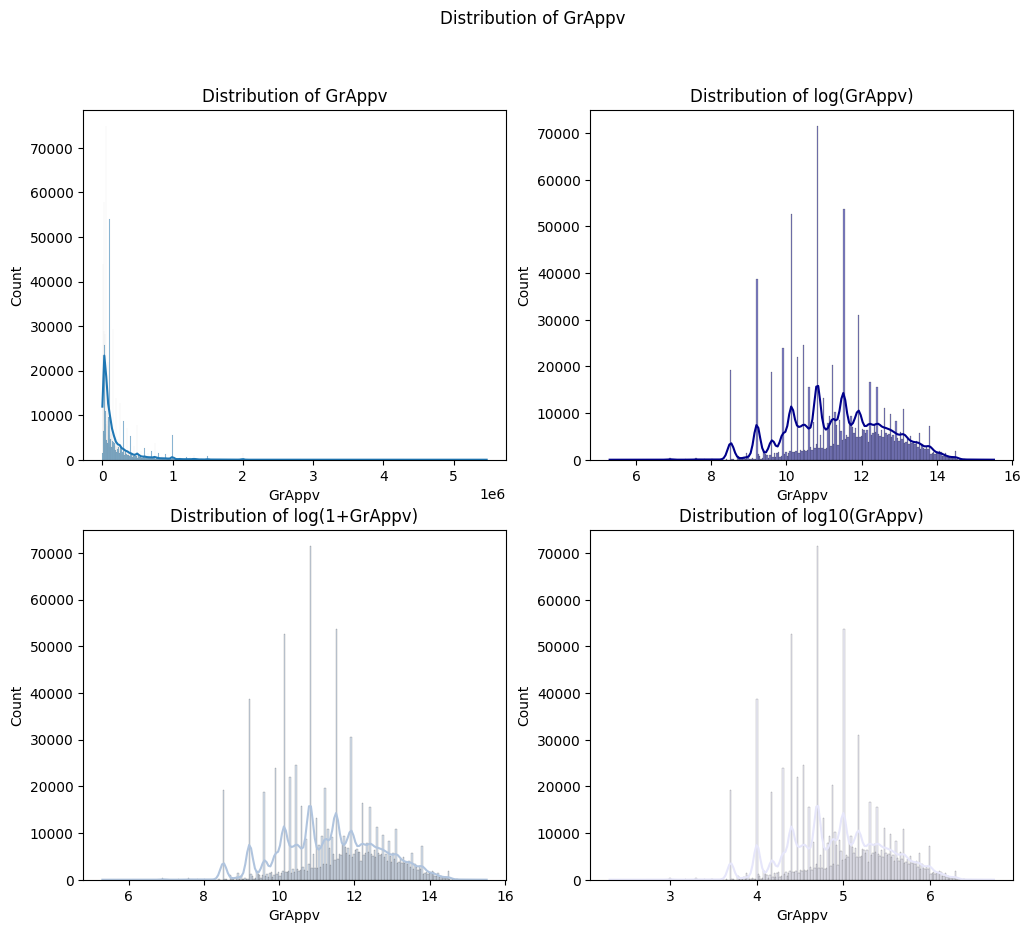

In [51]:
 #Fig 2*2 sub-graph:
fig, axes= plt.subplots(2,2, figsize=(12,10))
fig.suptitle(f'Distribution of GrAppv')

#Normal distribution
sns.histplot(df['GrAppv'], ax=axes[0,0], kde=True)
axes[0,0].set_title(f'Distribution of GrAppv')

#Return the natural logarithm of i, inverse of exp(i)
log_data = np.log(df['GrAppv'])
sns.histplot(log_data,ax=axes[0,1], color='darkblue', kde=True)
axes[0,1].set_title(f'Distribution of log(GrAppv)')

#Return the natural logarithm of one plus the input array, element-wise.
#the inverse of exp(x)-1
log_1p = np.log1p(df['GrAppv'])
sns.histplot(log_1p, ax=axes[1,0], color='lightsteelblue', kde=True)
axes[1,0].set_title(f'Distribution of log(1+GrAppv)')

#Return the base 10 log
log_10 = np.log10(df['GrAppv'])
sns.histplot(log_10, ax=axes[1,1], color='lavender', kde=True)
axes[1,1].set_title(f'Distribution of log10(GrAppv)')

plt.show()

## Study of categorical values


In [11]:
#Frequency table
columns_cat = df[['Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural']]
for i in columns_cat:
    count=df[i].value_counts()
    print("Frequency:")
    print(count)

Frequency:
Name
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
DIRECT HIT MARKETING L L C           1
Name: count, Length: 779583, dtype: int64
Frequency:
City
LOS ANGELES    11558
HOUSTON        10247
NEW YORK        7846
CHICAGO         6036
MIAMI           5594
               ...  
Beeville           1
Tuckasegee         1
Branchburgh        1
PARADIS            1
MARIDEN            1
Name: count, Length: 32581, dtype: int64
Frequency:
State
CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545


In [ ]:
#Visualization in apple pie chart
for i in columns_cat:
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%').set_title(f'{i} distribution')

#A ne pas faire tourner ça fait CRACHER le pc !

Text(0.5, 1.0, 'Name distribution')

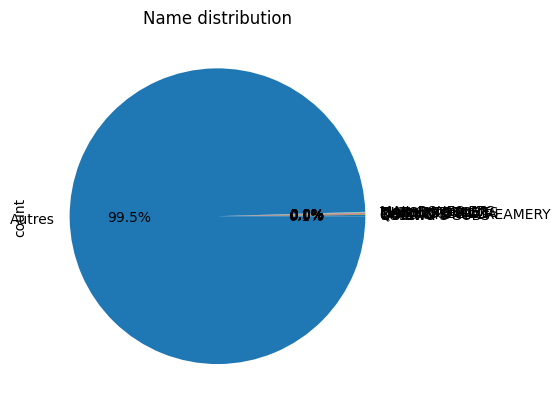

In [5]:

value_counts = df['Name'].value_counts()
top_10 = value_counts.nlargest(10)
other_count = value_counts.iloc[10:].sum()

if other_count > 0:
    top_10["Autres"] = other_count

top_10.plot(kind='pie', autopct='%1.1f%%').set_title(f'Name distribution')


Text(0.5, 1.0, 'Name distribution')

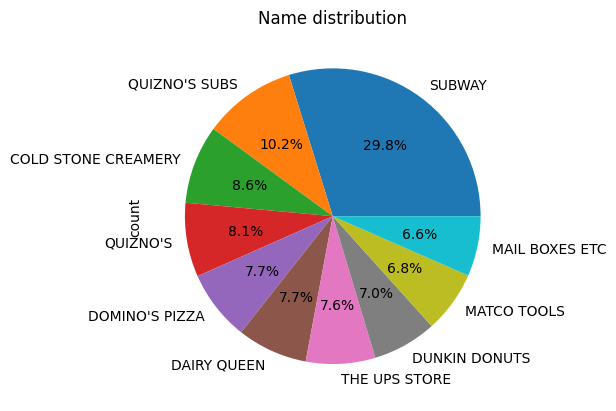

In [7]:

df['Name'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Name distribution')


Text(0.5, 1.0, 'City distribution')

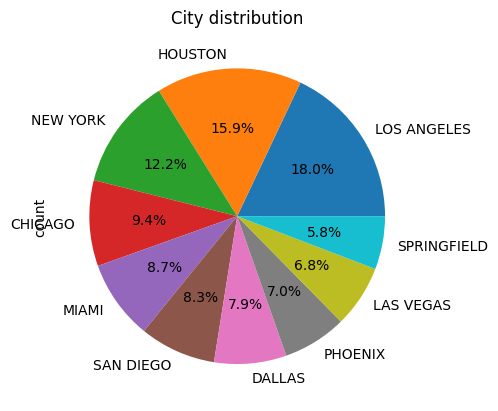

In [9]:
df['City'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'City distribution')


Text(0.5, 1.0, 'Zip distribution')

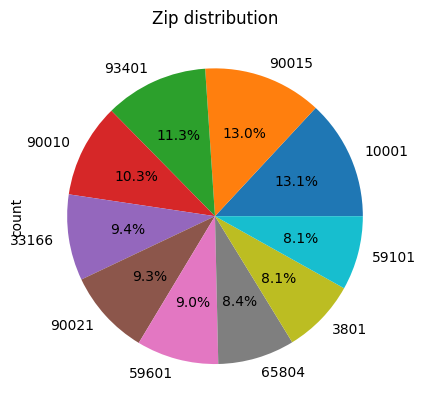

In [10]:

df['Zip'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Zip distribution')


Text(0.5, 1.0, 'Bank distribution')

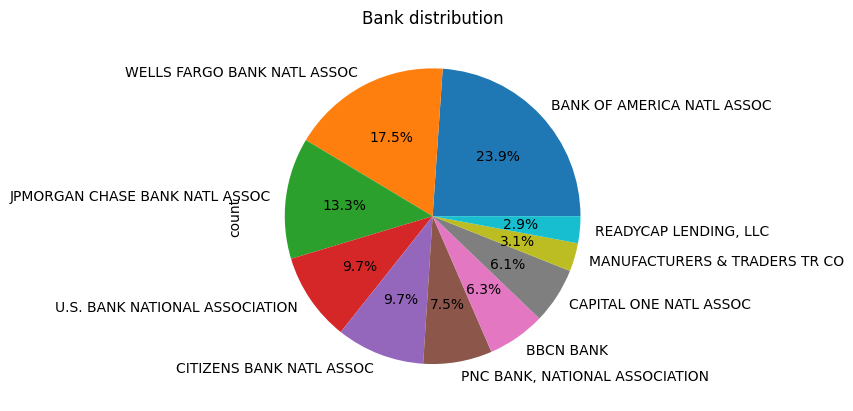

In [11]:

df['Bank'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Bank distribution')


Text(0.5, 1.0, 'State distribution')

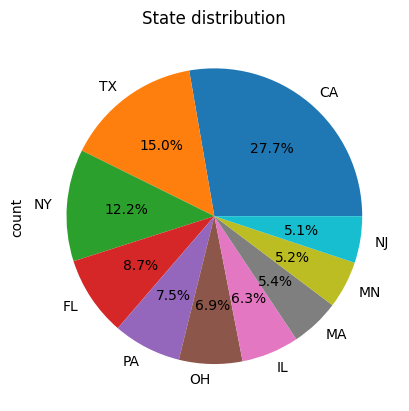

In [12]:

df['State'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'State distribution')


Text(0.5, 1.0, 'NewExist distribution')

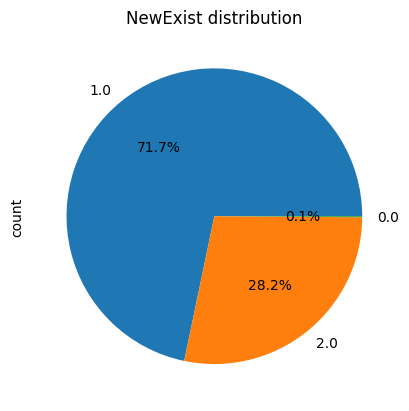

In [14]:

df['NewExist'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'NewExist distribution')


Text(0.5, 1.0, 'FranchiseCode distribution')

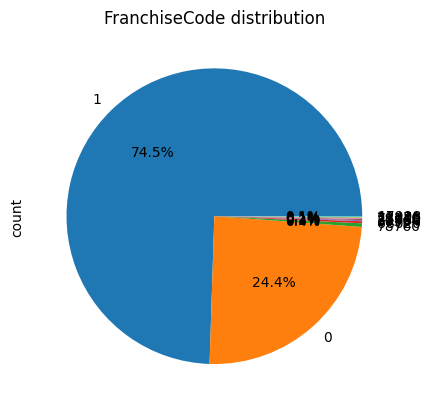

In [15]:

df['FranchiseCode'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'FranchiseCode distribution')


Text(0.5, 1.0, 'UrbanRural distribution')

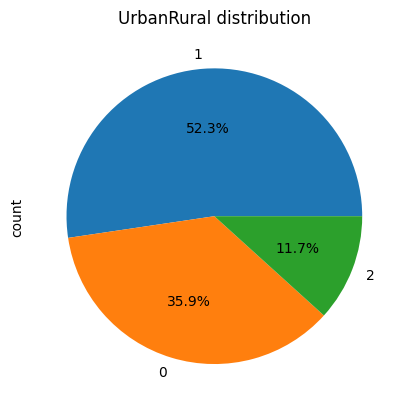

In [16]:

df['UrbanRural'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'UrbanRural distribution')


In [20]:
df['City'].value_counts()



City
LOS ANGELES    11558
HOUSTON        10247
NEW YORK        7846
CHICAGO         6036
MIAMI           5594
               ...  
Beeville           1
Tuckasegee         1
Branchburgh        1
PARADIS            1
MARIDEN            1
Name: count, Length: 32581, dtype: int64

<Axes: xlabel='FranchiseCode'>

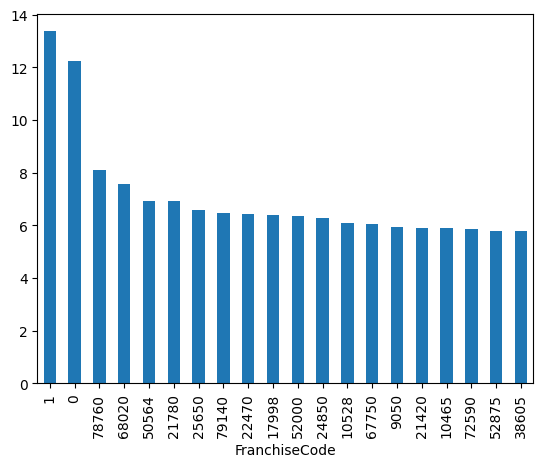

In [30]:
test=df['FranchiseCode'].value_counts()
test_log=np.log(test)
test_log.nlargest(20).plot(kind='bar')

## Bivariate analysis

### Chi2 test
These tests allow us to see correlation between categorical values
H0 = two variables are independant H1 = two variables are dependant

If p is less than 0.05, H0 is rejected.

In [52]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'MIS_Status', 'GrAppv'],
      dtype='object')

In [56]:
#Test for name and city
table_SR = df.groupby(['Name' , 'City']).size().unstack(fill_value=0)
chi2, p, dof, expected = chi2_contingency(table_SR)
print(f"Chi² : {chi2}, p-value : {p}, Degrees of Freedom : {dof}")
print(f"Expected numbers : \n{expected}")

/tmp/ipykernel_5970/3224340034.py:2: PerformanceWarning: The following operation may generate 25398648874 cells in the resulting pandas object.
  table_SR = df.groupby(['Name' , 'City']).size().unstack(fill_value=0)


MemoryError: Unable to allocate 23.7 GiB for an array with shape (25398648874,) and data type bool

The amount of datas is too important to perform the test in this way, even with a groupby to replace the crosstab.
Lets try with an other way!

In [ ]:
def filter_top(series, top_n=500):
    top_values = series.value_counts().nlargest(top_n).index
    return series.where(series.isin(top_values), 'Autres')

df['Name'] = filter_top(df['Name'], top_n=500)
df['City'] = filter_top(df['City'], top_n=200)

table_SR = df.groupby(['Name', 'City']).size().unstack(fill_value=0)
print(f"New shape of the table_SR : {table_SR.shape}")

chi2, p, dof, expected = chi2_contingency(table_SR)
print(f"Chi² : {chi2}, p-value : {p}, Degrees of Freedom : {dof}")


New shape of the table_SR : (500, 200)
Chi² : 275893.8115552111, p-value : 0.0, Degrees of Freedom : 99301


In [59]:
#Test on a random sample
df_sampled = df.sample(n=10000, random_state=42)  # Échantillon de 10 000 lignes
table_SR = df_sampled.groupby(['Name', 'City']).size().unstack(fill_value=0)

print(f"table_SR : {table_SR.shape}")

chi2, p, dof, expected = chi2_contingency(table_SR)
print(f"Chi² : {chi2}, p-value : {p}, Degrees of Freedom : {dof}")


table_SR : (167, 200)
Chi² : 34653.69817854636, p-value : 2.754661876022718e-10, Degrees of Freedom : 33034


In [60]:
df['Name'] = filter_top(df['Name'], top_n=100)
df['City'] = filter_top(df['City'], top_n=100)

table_SR = df.groupby(['Name', 'City']).size().unstack(fill_value=0)
print(f"New shape of the table_SR : {table_SR.shape}")

chi2, p, dof, expected = chi2_contingency(table_SR)
print(f"Chi² : {chi2}, p-value : {p}, Degrees of Freedom : {dof}")

New shape of the table_SR : (100, 100)
Chi² : 16084.909228020399, p-value : 0.0, Degrees of Freedom : 9801


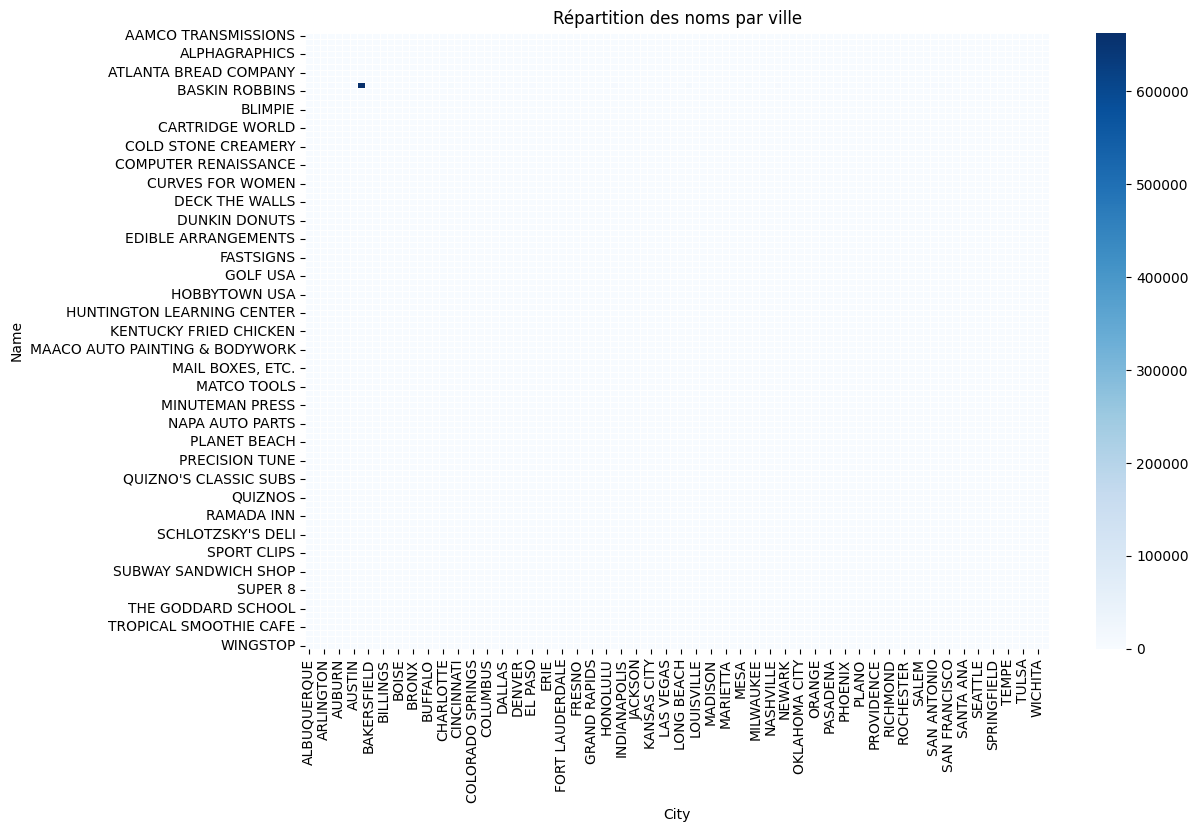

In [61]:

plt.figure(figsize=(12, 8))
sns.heatmap(table_SR, cmap="Blues", linewidths=0.5)
plt.title("Répartition des noms par ville")
plt.show()

What the fuck is that? 

Test for State and MIS

In [106]:
table_SR = df.groupby(['State', 'MIS_Status']).size().unstack(fill_value=0)
print(f"New shape of the table_SR : {table_SR.shape}")

chi2, p, dof, expected = chi2_contingency(table_SR)
print(f"Chi² : {chi2}, p-value : {p}, Degrees of Freedom : {dof}")

New shape of the table_SR : (51, 2)
Chi² : 11163.87470891073, p-value : 0.0, Degrees of Freedom : 50


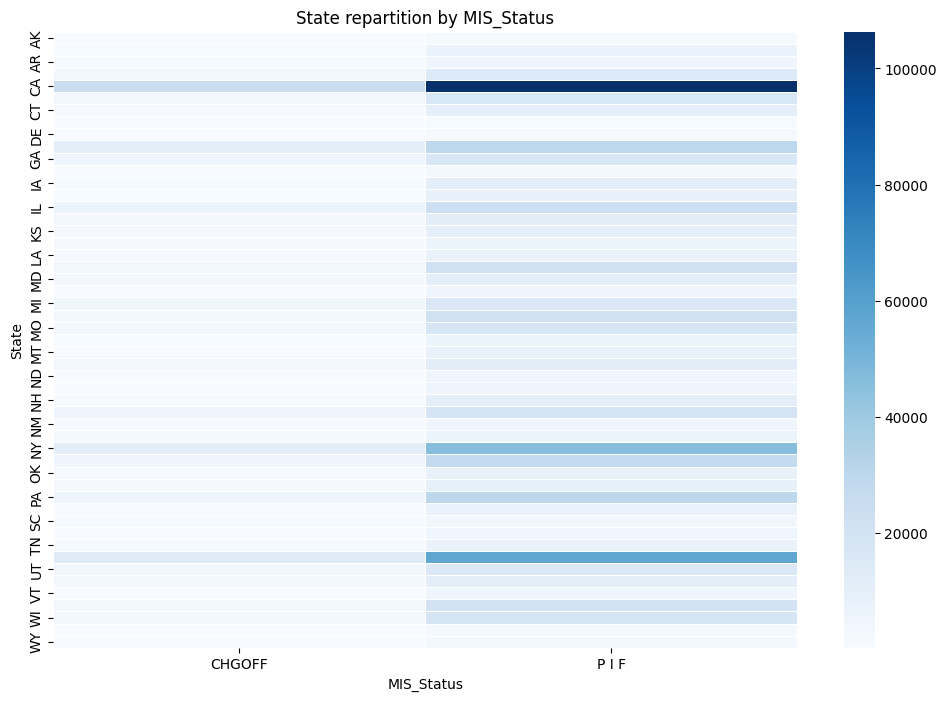

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(table_SR, cmap="Blues", linewidths=0.5)
plt.title("State repartition by MIS_Status")
plt.show()

There is a correlation between State and MIS status. In California, it seems that there are a large increase of PIF, and more discreet increas of CHOFF. It could be interessting to look of the ratio between PIF and CHGOFF in the different state.

### Hacene Boucle

In [111]:
df_chi2 = df[['State', 'NAICS','UrbanRural','LowDoc','Bank','RevLineCr','FranchiseCode','NewExist','MIS_Status']]
df_cible = df_chi2['MIS_Status'].astype('category')

df_var = df_chi2.drop(columns="MIS_Status")


for column in df_var.columns:
    df_var = df_chi2[column].astype('category')
    contingency_table = pd.crosstab(df_var, df_cible)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    p_crit = stats.chi2.ppf(0.95, dof)
    print(f'Result for {column}')
    print("Chi-2:", chi2)
    print("Degree of Liberty:", dof)
    print("Critical value:", p_crit)

    print("P-value:", p)
    print("Table of expected-value :\n", expected)
    print('')
    print('================================================================================')

Result for State
Chi-2: 11163.87470891073
Degree of Liberty: 50
Critical value: 67.5048065495412
P-value: 0.0
Table of expected-value :
 [[   422.00900626   1980.99099374]
 [  1468.16283492   6891.83716508]
 [  1112.18603272   5220.81396728]
 [  3095.08394768  14528.91605232]
 [ 22915.98468936 107572.01531064]
 [  3617.37058298  16980.62941702]
 [  2129.71419845   9997.28580155]
 [   283.27113071   1329.72886929]
 [   385.12931782   1807.87068218]
 [  7234.0386957   33957.9613043 ]
 [  3911.35438509  18360.64561491]
 [   633.4525533    2973.5474467 ]
 [  2104.95212193   9881.04787807]
 [  1667.66438761   7828.33561239]
 [  5197.22618859  24396.77381141]
 [  2472.51968335  11606.48031665]
 [  2011.69919546   9443.30080454]
 [  1355.76759397   6364.23240603]
 [  1680.66008734   7889.33991266]
 [  4406.59591553  20685.40408447]
 [  2328.51328089  10930.48671911]
 [  1042.64147738   4894.35852262]
 [  3598.93073876  16894.06926124]
 [  4277.86824113  20081.13175887]
 [  3626.85393143  1702

In [ ]:
df_2_anova = raw_df[['CreateJob', 'RetainedJob','DisbursementGross','BalanceGross','GrAppv','SBA_Appv','MIS_Status']]

for column in df_2_anova.columns:
    df_cible = df_2_anova['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df[column],df_cible )
    stat_anova, p_value = stats.f_oneway(contingency_table['CHGOFF'],contingency_table['P I F'])

    print(f'le résultat pour {column}')
    print("Statistique f:", stat_anova)
    # print("Degrés de liberté:", dof)
    # print("valeur critique:", p_crit)

    print("P-value:", p_value)
    # print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

#### A faire run plus tard quand Khadija aura tout nettoyer et clean up, là on verra un peu plus ou on mets les pieds...

In [114]:
#Test for rural and smokers 
table_RSm = pd.crosstab(df['MIS_Status'], df['UrbanRural'])
chi2, p, dof, expected = chi2_contingency(table_RSm)
print(chi2, p)

39928.91264630745 0.0


<Axes: xlabel='UrbanRural', ylabel='MIS_Status'>

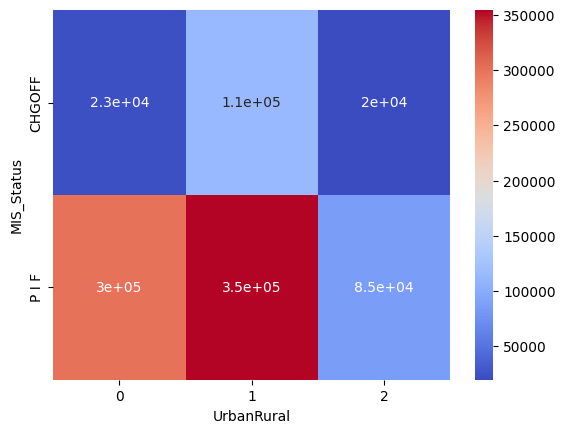

In [115]:
sns.heatmap(table_RSm, annot=True, cmap='coolwarm')

It seems that there is a strong correlation between rural/urban location of the business and its capacity to reimburse the charges.

In [ ]:
plt.subplots(figsize=(10,6))
ax=sns.boxplot(y='')

### Evolution of the grants through time

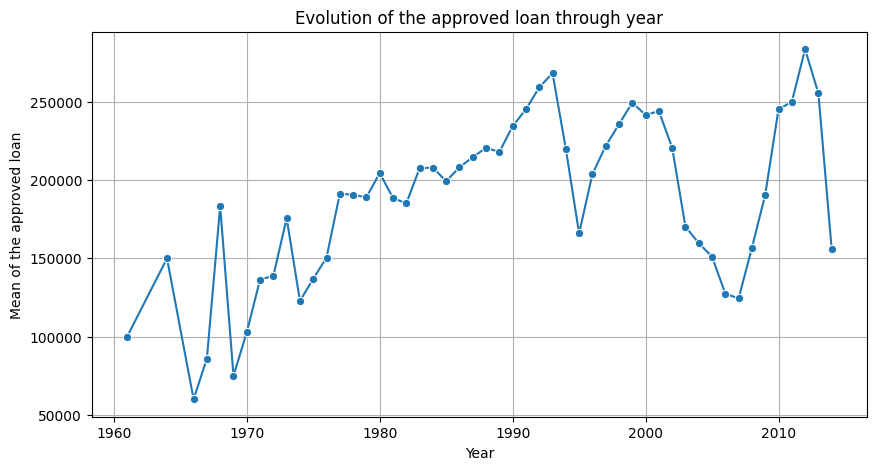

In [84]:
df_grouped = df.groupby('Year')['GrAppv'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, marker='o')
plt.xlabel("Year")
plt.ylabel("Mean of the approved loan")
plt.title("Evolution of the approved loan through year")
plt.grid()
plt.show()

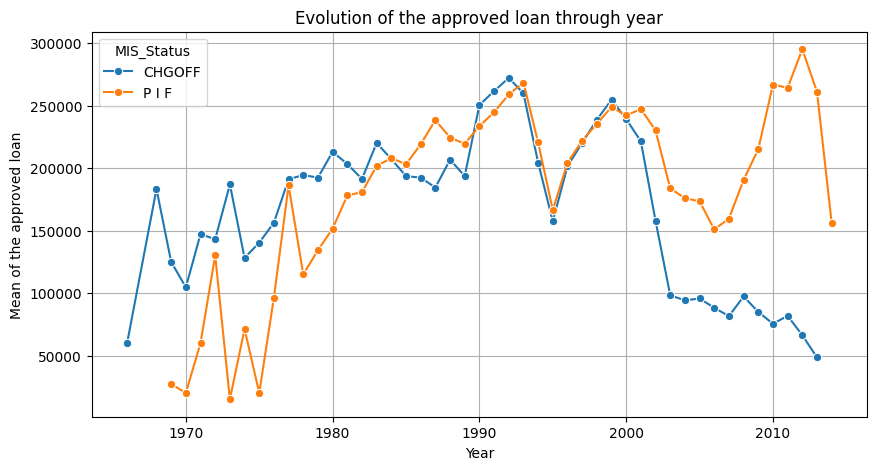

In [85]:
df_grouped = df.groupby(['Year', 'MIS_Status'])['GrAppv'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x="Year", y="GrAppv", hue="MIS_Status", marker='o')
plt.xlabel("Year")
plt.ylabel("Mean of the approved loan")
plt.title("Evolution of the approved loan through year")
plt.grid()
plt.show()

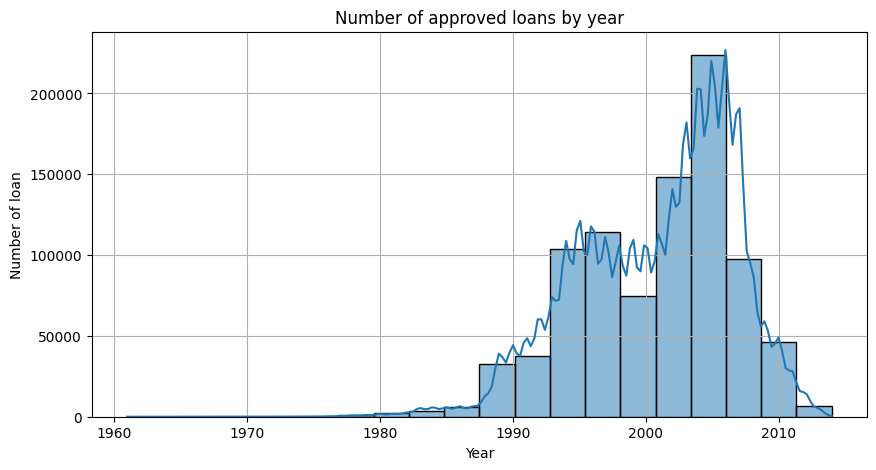

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Year'], bins=20, kde=True)
plt.xlabel("Year")
plt.ylabel("Number of loan")
plt.title("Number of approved loans by year")
plt.grid()
plt.show()

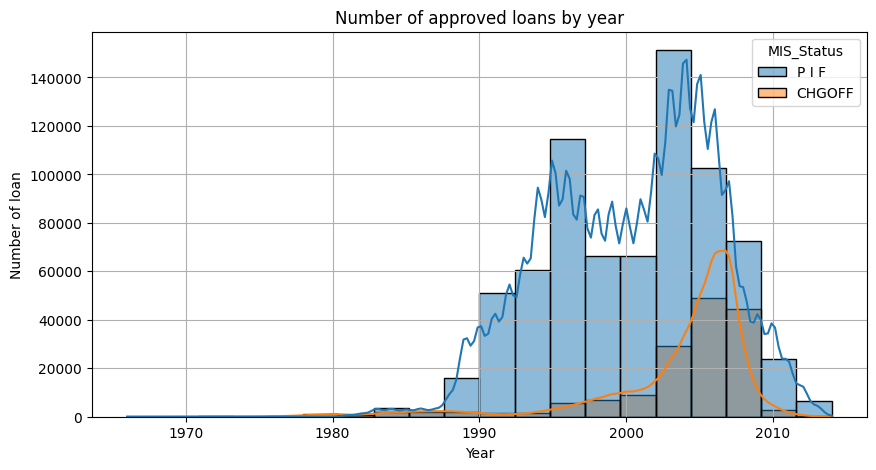

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Year', hue='MIS_Status', bins=20, kde=True)
plt.xlabel("Year")
plt.ylabel("Number of loan")
plt.title("Number of approved loans by year")
plt.grid()
plt.show()

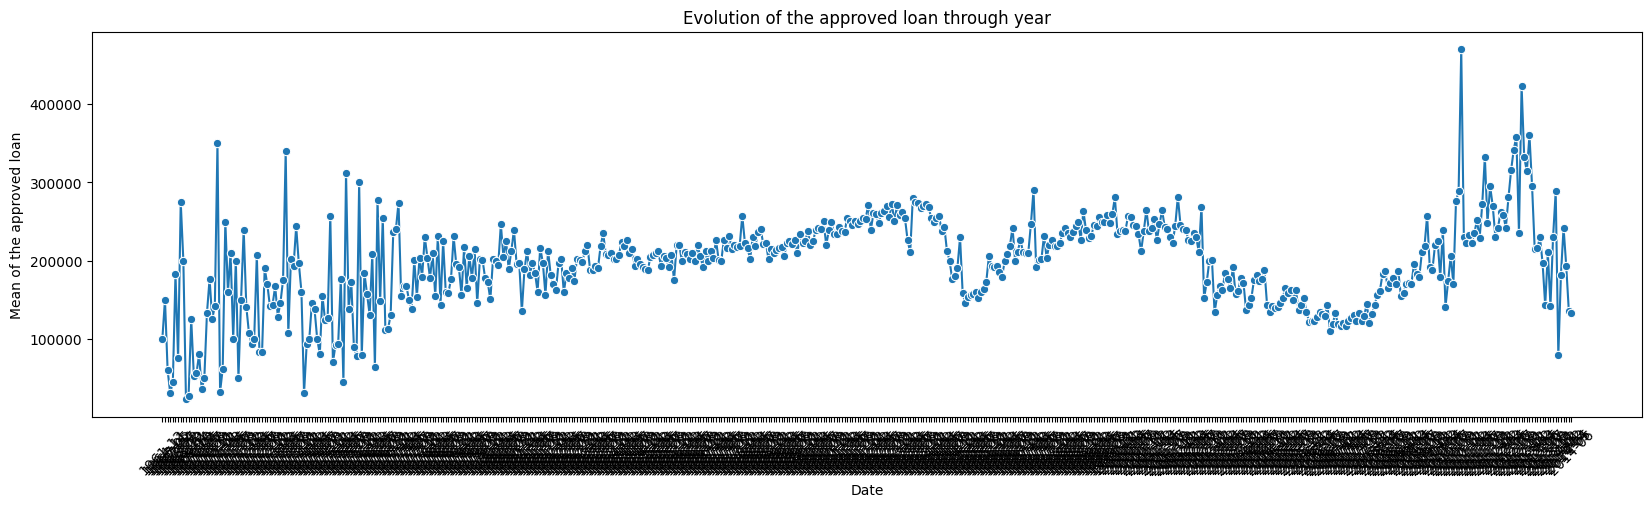

In [98]:
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['YearMonth']=df['ApprovalDate'].dt.to_period('M')

df_grouped = df.groupby('YearMonth')['GrAppv'].mean().reset_index()
plt.figure(figsize=(20, 5))
df_grouped['YearMonth']=df_grouped['YearMonth'].astype(str)
sns.lineplot(data=df_grouped, x="YearMonth", y="GrAppv",marker='o')
plt.xlabel("Date")
plt.ylabel("Mean of the approved loan")
plt.xticks(rotation=45)
plt.title("Evolution of the approved loan through year")

plt.show()

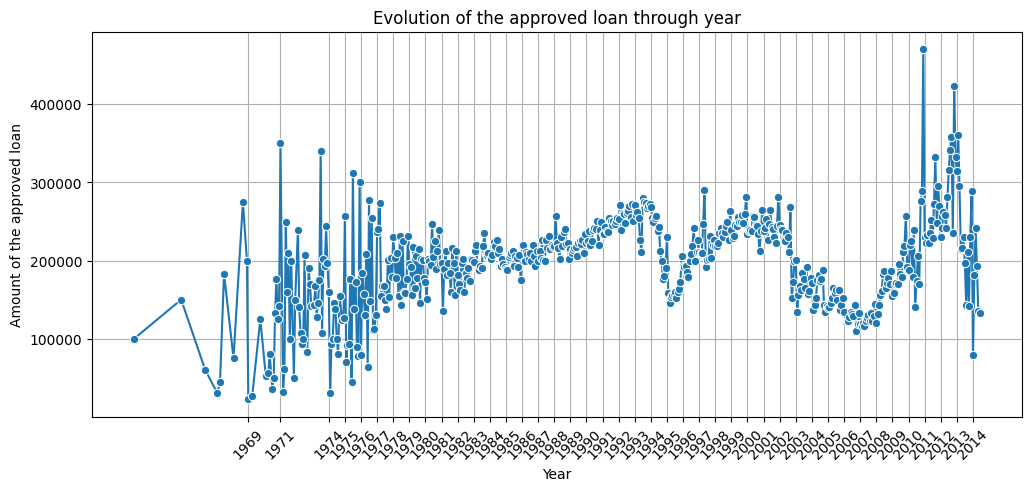

In [105]:
#Creation of only one year x ticks

# Con
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])

# Extraire Année + Mois sous forme de période
df['YearMonth'] = df['ApprovalDate'].dt.to_period('M')

# Convertir la période en timestamp pour éviter l'erreur
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

# Grouper par mois et calculer la moyenne des montants de prêts
df_grouped = df.groupby('YearMonth')['GrAppv'].mean().reset_index()

# Sélectionner uniquement les dates de janvier pour l'axe X
january_dates = df_grouped[df_grouped['YearMonth'].dt.month == 1]['YearMonth']

# Tracer le graphique
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_grouped, x="YearMonth", y="GrAppv", marker='o')

# Modifier les ticks pour afficher seulement les années en janvier
plt.xticks(january_dates, labels=january_dates.dt.year, rotation=45)

plt.xlabel("Year")
plt.ylabel("Amount of the approved loan")
plt.title("Evolution of the approved loan through year")
plt.grid()
plt.show()